In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from shapely.geometry import Point, LineString, Polygon
from shapely.affinity import rotate
from shapely.ops import transform
from shapely import wkb


In [17]:
output_features_def8 = np.load("output_features_def2001-3000PBF_sc2.npy")
input_data8 = np.load("input_data2001-3000PBF_sc2.npy")
input_geom = np.load("input_datageom2001-3000PBF_sc2.npy",allow_pickle=True)
print(input_data8.shape)
print(output_features_def8.shape)
print(input_geom.shape)

(3828, 452)
(3828, 17)
(3828,)


In [18]:
input_data8[0:5,0:4]

array([[0.23239349, 0.19232643, 0.10131134, 0.24242492],
       [0.23239349, 0.19232643, 0.10131134, 0.24242492],
       [0.23239349, 0.19232643, 0.10131134, 0.24242492],
       [0.23239349, 0.19232643, 0.10131134, 0.24242492],
       [0.01483601, 0.00168233, 0.00062237, 0.00141314]])

In [19]:
output_features_def8[0:5,0:4]

array([[36.757053, 27.735605, 19.704256, 21.945917],
       [39.318275, 30.363415, 19.704256, 23.4406  ],
       [39.028652, 29.74101 , 19.704256, 22.019955],
       [40.638355, 31.940004, 19.704256, 23.168268],
       [35.921825, 20.62269 , 20.62269 , 16.660501]], dtype=float32)

In [20]:
input_geom[0:5]

array([<shapely.geometry.point.Point object at 0x0000016970B0DA30>,
      dtype=object)

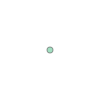

In [24]:
input_geom[0]
input_geom[1]
input_geom[2]
input_geom[3]
input_geom[4]

C:\Users\botteldo\AppData\Local\Temp\10\ipykernel_2000\217778337.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Nsamples = np.int(output_features_def8.shape[0]/4)


Text(0, 0.5, 'ETLA50+3')

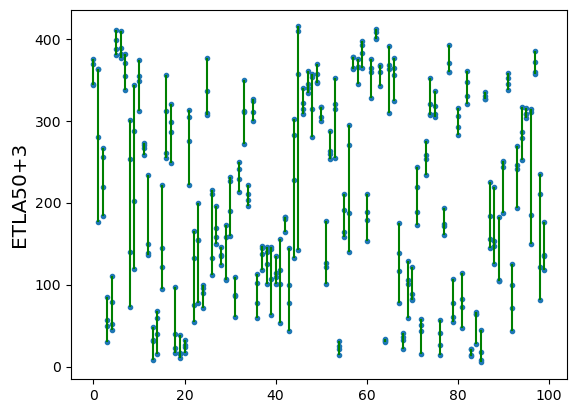

In [67]:
#create x-axis and plot
feature = 5
plot_to = 100

ml_cols = ["LAeq", "LA50", "LA90", "LA10-LA90", "IntRatio", "ETLA50+3", "ETLA50+10", "CoG_125_8k", "N", "N50", "N90", "S05", "S10", "PSD_0_3", "PSD_3_6", "PSD_6_12", "PSD_12_18"]
Nsamples = np.int(output_features_def8.shape[0]/4)
x = np.zeros((Nsamples*4,1))
xmm = np.zeros((Nsamples,1))
ymin = np.zeros((Nsamples,output_features_def8.shape[1]))
ymax = np.zeros((Nsamples,output_features_def8.shape[1]))
for isample in range(0,Nsamples):
    x[isample*4:isample*4+4] = isample
    xmm[isample] = isample
    ymin[isample,:] = output_features_def8[isample*4:isample*4+4,:].min(axis=0)
    ymax[isample,:] = output_features_def8[isample*4:isample*4+4,:].max(axis=0)

plt.plot(x[0:plot_to*4],output_features_def8[0:plot_to*4,feature],'.')
plt.vlines( x=xmm[0:plot_to], ymin=ymin[0:plot_to,feature], ymax=ymax[0:plot_to,feature], colors = 'green')
plt.ylabel(ml_cols[feature], fontsize = 'x-large')

In [31]:
x[1:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.]])